A Boltzmann Machine is a type of stochastic neural network used for unsupervised learning, and it learns by adjusting the weights between neurons to minimize the energy function.
Below is an example code for an Unrestricted Boltzmann Machine (without hidden units):

In [1]:
import numpy as np

class BoltzmannMachine:
    def __init__(self, num_units, learning_rate=0.1):
        # Initialize weights randomly between [-0.1, 0.1]
        self.num_units = num_units
        self.weights = np.random.uniform(-0.1, 0.1, (num_units, num_units))
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.learning_rate = learning_rate

    def energy(self, state):
        """Compute the energy of the given state"""
        return -0.5 * np.dot(state.T, np.dot(self.weights, state))

    def prob(self, state, idx):
        """Compute the activation probability of a given unit"""
        activation = np.dot(self.weights[idx], state)
        return 1.0 / (1 + np.exp(-activation))

    def sample(self, state):
        """Perform Gibbs Sampling to update the state"""
        new_state = np.copy(state)
        for i in range(self.num_units):
            p = self.prob(new_state, i)
            new_state[i] = 1 if np.random.rand() < p else 0
        return new_state

    def train(self, data, num_epochs=1000):
        num_samples = data.shape[0]

        for epoch in range(num_epochs):
            for sample in data:
                # Positive phase: Clamp the data and sample
                pos_state = sample.copy()

                # Negative phase: Gibbs sampling
                neg_state = self.sample(pos_state)

                # Update weights
                self.weights += self.learning_rate * (np.outer(pos_state, pos_state) - np.outer(neg_state, neg_state))

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{num_epochs}')

    def generate_sample(self, num_steps=100):
        """Generate a sample from the trained Boltzmann Machine"""
        state = np.random.randint(0, 2, self.num_units)
        for step in range(num_steps):
            state = self.sample(state)
        return state

# Example usage:
if __name__ == "__main__":
    # Binary training data: 5 samples, 4 units
    training_data = np.array([[0, 1, 0, 1],
                              [1, 1, 1, 0],
                              [1, 0, 1, 0],
                              [0, 1, 1, 1],
                              [1, 0, 0, 1]])

    # Initialize and train Boltzmann Machine
    bm = BoltzmannMachine(num_units=4)
    bm.train(training_data, num_epochs=1000)

    # Generate a sample after training
    generated_sample = bm.generate_sample()
    print("Generated Sample:", generated_sample)


Epoch 0/1000
Epoch 100/1000
Epoch 200/1000
Epoch 300/1000
Epoch 400/1000
Epoch 500/1000
Epoch 600/1000
Epoch 700/1000
Epoch 800/1000
Epoch 900/1000
Generated Sample: [1 1 1 0]


# Constructor of BM Class
def __init__(self, num_units, learning_rate=0.1):

This is the constructor method for the class BoltzmannMachine. It is called when an instance of the class is created. It takes two arguments:
num_units: The number of units (or neurons) in the Boltzmann Machine.
learning_rate: The rate at which the model updates the weights during training (default is 0.1).
self.num_units = num_units

The instance variable self.num_units stores the number of units (or neurons) in the Boltzmann Machine.
This value will be used throughout the class, particularly for managing the size of the network and other related operations.
self.weights = np.random.uniform(-0.1, 0.1, (num_units, num_units))

This line initializes the weight matrix self.weights, which stores the connection strengths (weights) between each pair of units in the Boltzmann Machine.
The weights are initialized randomly between -0.1 and 0.1 using np.random.uniform. This means the weights are real numbers sampled from a uniform distribution in this range.
The shape of the weight matrix is (num_units, num_units), meaning it's a square matrix where each element self.weights[i, j] represents the weight between unit i and unit j.
np.fill_diagonal(self.weights, 0)

This ensures that there are no "self-connections" in the Boltzmann Machine. In other words, the weight of a unit to itself (the diagonal elements of the weight matrix) is set to 0.
np.fill_diagonal sets all diagonal elements in the weights matrix to 0, effectively ensuring that no unit can influence itself.
self.learning_rate = learning_rate

This sets the instance variable self.learning_rate to the value passed as an argument or to the default value of 0.1 if no argument is provided.
The learning rate controls how fast the weights are adjusted during training. A smaller learning rate means smaller updates to the weights, while a larger learning rate results in larger updates.

# Energy Function of BM

def energy(self, state):

This method calculates the energy of a given state for the Boltzmann Machine.
The energy function is a measure of how stable or likely a particular configuration (state) of the network is. In Boltzmann Machines, lower energy corresponds to more stable configurations.
The argument state is a binary vector (array) representing the current state of all the units (neurons) in the network. Each element in state can either be 0 or 1, indicating the active or inactive state of the corresponding unit.
return -0.5 * np.dot(state.T, np.dot(self.weights, state))

This line computes the energy of the network in the given state.
The energy function for a Boltzmann Machine is defined as:
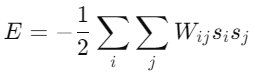


where:
𝑊𝑖𝑗: is the weight between units i and 𝑗,
𝑠𝑖 and 𝑠𝑗 are the states (0 or 1) of units i and j.
np.dot(self.weights, state): This computes the matrix multiplication of the weight matrix self.weights with the state vector state. This step essentially computes the weighted sum of the state vector with the connection strengths (weights) between units.
np.dot(state.T, ...): This computes the dot product of the transpose of the state vector (which is just the original state in this case since it's a 1D array) with the result of the matrix multiplication from the previous step.
The factor -0.5 is included to account for the symmetry in the weight matrix and ensure the correct energy computation, as each weight is counted twice in a full energy expression.

# Activation Probability Calculation

def prob(self, state, idx):

This method computes the activation probability of a particular unit (neuron) in the Boltzmann Machine, given the current state of the network.
The unit whose activation probability is being calculated is identified by the index idx, and state is the current binary vector representing the state of all units in the network.
activation = np.dot(self.weights[idx], state)

self.weights[idx] refers to the weights connecting the unit at index idx to all other units. This gives a row (or vector) from the weight matrix corresponding to the selected unit.
np.dot(self.weights[idx], state) computes the weighted sum of the states of all the units that are connected to the unit at index idx. This weighted sum represents the influence of the other units on the unit idx:
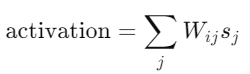

Where:𝑊𝑖𝑗 is the weight between the unit at index i and the unit at index j,
𝑠𝑗 is the state (either 0 or 1) of the unit 𝑗.
This value, called activation, measures the total influence that other units in the network exert on the unit at index idx.

return 1.0 / (1 + np.exp(-activation))

This is the sigmoid function, which converts the weighted sum (activation) into a probability value between 0 and 1:
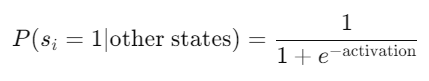

# Gibbs Sampling

Gibbs Sampling is a type of Markov Chain Monte Carlo (MCMC) algorithm used to generate samples from a probability distribution, especially when direct sampling is difficult. It's widely used in probabilistic models, including Boltzmann Machines, to update the states of units and estimate complex distributions.

